

# What's that Pokemon? - Convolutional Neural Networks



[Edward Toth, PhD, University of Sydney]

- e-mail: eddie_toth@hotmail.com
- Add me on: https://www.linkedin.com/in/edward-toth/ 
- Join the community: https://www.meetup.com/Get-Singapore-Meetup-Group/
- Data Avenger: https://data-avenger.mailchimpsites.com/


Three things you'll learn:
1. Transfer learning 
2. Image generators
3. Frequency problem





Datasets: <br>
https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types <br>

In [ ]:
from IPython.core.display import HTML
HTML('<div class="tenor-gif-embed" data-postid="5662253" data-share-method="host" data-width="100%" data-aspect-ratio="1.7913669064748199"><a href="https://tenor.com/view/gotta-catch-em-all-gif-5662253">Gotta Catch Em All GIF</a> from <a href="https://tenor.com/search/gottacatchemall-gifs">Gottacatchemall GIFs</a></div><script type="text/javascript" async src="https://tenor.com/embed.js"></script>')

 
## <center> WTF is Pandas: Online Course <center> 
    Stage 1   
    - Learn to speak Python-tongue
    (Python basics, Conditional/Loop statements, Functions)
    Stage 2 
    - Unleash your inner Pandas
    (Create Series/DataFrame, Styling, Read files and so on)
    Stage 3 
    - Mystical arts of Data Manipulation
    (Clean, Prepare, Merge data and much more Magic)
    Stage 4 
    - Mind-Body-Data Connection
    (Understanding Data with Statistics, Grouping and Visualization) 
    

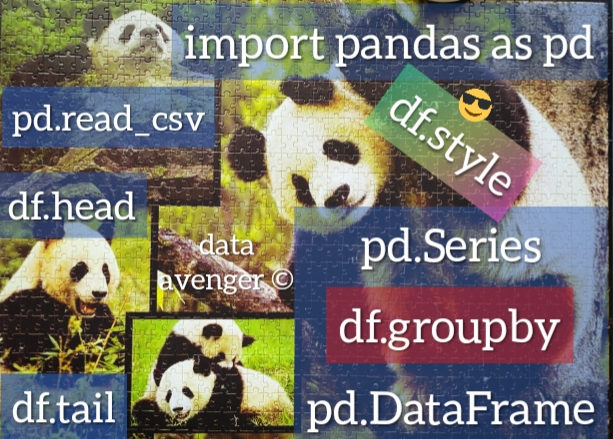

<a id = "0"></a><br>
Table of Contents
1. [Load Libraries](#1)  
1. [Read Data](#2)
1. [Data Preparation](#3) 
1. [LAZY WAY: Transfer Learning](#4)   
   a) Design <br />
   b) Compile<br />
   c) Fit <br />
   d) Assess <br />
1. [Frequency Problem ](#5)

    

<a id = "1"></a><br>
## Load Libraries

In [ ]:
import re
# import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
from IPython.display import display
# print("Tensorflow version " + tf.__version__)

# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model


<a id = "2"></a><br>
## Read data 

Predict the primary type of Pokemon based on images:
- View pokemon number of images
- Get data into a useable format
 


In [ ]:
data = pd.read_csv("../input/pokemon-images-and-types/pokemon.csv")
# Define function to extract row 
def get_row(df,col,name):
    return df[df[col]==name]

pokedex = "../input/pokemon-images-and-types/images/images/"
filenames = os.listdir(pokedex)
pnames, ptypes = [],[]
for path in os.listdir(pokedex):
    name = re.search(r"^([^.]*).*", path).group(1)
    pnames.append(name.capitalize())
    ptypes.append(data['Type1'][int(get_row(data,'Name',name).index.values)]) 
        
N_IMAGES = len(filenames)
print("Number of pokemon: ", N_IMAGES)
# Create new data frame
lst1 = filenames
lst2 = pnames
lst3 = ptypes 
pokemon_data = pd.DataFrame({'Filename':lst1,'Pokemon':lst2, 'Primary Type':lst3}) #.sort_values('B')#
display(data,pokemon_data.head())

<a id = "3"></a><br>
## Data Prepration
- View images and check sizes
- Split images into train, valid, test set 
- Introducing ImageDataGenerator

[Back to Top](#TOP)

### View images and check sizes

In [ ]:
fig = plt.figure(16, figsize=(20, 15))
num_plots = 8
images = [] 
for i in range(N_IMAGES):        
    image = mpimg.imread(pokedex + pokemon_data['Filename'][i])
    images.append(image)
    if 0 <= i <= 7: 
        name = pokemon_data['Pokemon'][i]
        pokemon_type = pokemon_data['Primary Type'][i]
        a = fig.add_subplot(2, num_plots, i + 1).set_title(name+": "+pokemon_type, size=15)
        plt.imshow(image)
        plt.axis("off")
plt.show()
plt.tight_layout()

# CHECK IMAGE SIZES
sizes = []
for i in range(N_IMAGES):
    sizes.append( mpimg.imread(pokedex + pokemon_data['Filename'][i]).shape)

print("The size of the first image is: ",sizes[0])
print("The unique sizes of the image dataset: ", np.unique(sizes,axis=0))
# len(images)


In [ ]:
# import cv2     # Image Processing
# fig = plt.figure(16, figsize=(20, 15)) # Create a figure
# IMAGE_SIZE =   (64, 64)#  re-shape first two dimensions 
# adj_images, numbered_labels = [], []
# for i in range(N_IMAGES):     
#         image = mpimg.imread(pokedex + pokemon_data['Filename'][i])
#         image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR) #cv2.COLOR_BGR2RGB) # turns to RGB colors #COLOR_BGR2GRAY) # turn to gray scale#
#         image = cv2.resize(image, IMAGE_SIZE) # compress the dimensions
#         adj_images.append(image)
#         if 0 <= i <= 7:  
#             name = pokemon_data['Pokemon'][i]
#             pokemon_type = pokemon_data['Primary Type'][i]
#             a = fig.add_subplot(2, num_plots, i +1 ).set_title(name+": "+pokemon_type, size=15)
#             plt.imshow(image)
#             plt.axis("off")
# plt.show()
# plt.tight_layout()


### Split images into train, valid, test set

In [ ]:
train, valid, test = np.split(pokemon_data, [int(0.6*len(pokemon_data)), int(0.8*len(pokemon_data))])    
 
# [len(train)/len(df),len(valid)/len(df),len(test)/len(df)]

# len(np.unique(valid.index.values))

train, valid, test = train.reset_index(), valid.reset_index(), test.reset_index()

display(train,valid,test)

## ImageDataGenerator

- Problem: load a dataset but not enough memory on your device.
- Solution:  data generators for loading and processing images for deep learning models.


Further Resources:
- https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c
- https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/

In [ ]:
## Load data using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = datagen.flow_from_dataframe(
dataframe=train,
directory="../input/pokemon-images-and-types/images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=50,
seed=0,
shuffle=True,
class_mode="categorical",
target_size=(120,120))

valid_generator = datagen.flow_from_dataframe(
dataframe=valid,
directory="../input/pokemon-images-and-types/images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=50,
seed=0,
shuffle=True,
class_mode="categorical",
target_size=(120,120))

test_generator = datagen.flow_from_dataframe(
dataframe=test,
directory="../input/pokemon-images-and-types/images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=50,
seed=0,
shuffle=True,
class_mode="categorical",
target_size=(120,120))


### CHECK if images are correct
sample_training_images, _ = next(train_generator)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:8])

## If training set and validation set do not both have 18 classes, reload notebook

In [ ]:
sample_training_images[0].shape

<a id = "4"></a><br>
# LAZY WAY: Transfer Learning
## Convolutional Neural Networks (CNNs) 


### VGG16 

- Convolutional Neural Network with 16 Layers 
- Pre-trained model on images with 1000 classes (automobile, horse, etc.)
-  Training size (1.3M images), validation (50K images), and testing (100K images).
- Input shape has to be (224, 224, 3)

### 1. Design 
- Convolutional filters: extracts image features (like sharpening)
- MaxPooling Layers reduce the number of image features (like pixelating)
 


More info at:
- https://keras.io/api/applications/vgg/
- https://arxiv.org/pdf/1409.1556.pdf




    



In [ ]:
# Load the VGG16 model
# from keras.applications import VGG16
from keras.applications.vgg16 import VGG16
# https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(120, 120, 3))

If the above download fails, then create your own CNN

In [ ]:
# def CNN_new(train_generator,valid_generator,num_epochs):
#     # DESIGN  and COMPILE 
#     # CNN architecture: 5*[Convolutional layer + MaxPooling]-> Flatten -> Dense -> Dropout -> Dense (Output)
#     from keras.models import Sequential
#     from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
#     # Clear previous models   # Calculate the number of classes in the train set
#     keras.backend.clear_session()
#     num_classes = len(mydict)
#     model = Sequential([
#         # Note the input shape is the desired size of the image 120 x 120  
#         # This is the first convolution
#         Conv2D(16, (3,3), activation='relu', input_shape = sample_training_images[0].shape),
#         MaxPooling2D(2, 2),
#         # The second convolution
#         Conv2D(32, (3,3), activation='relu'),
#         MaxPooling2D(2,2),
#         # The third convolution
#         Conv2D(64, (3,3), activation='relu'),
#         MaxPooling2D(2,2),
#         # The fourth convolution
#         Conv2D(64, (3,3), activation='relu'),
#         MaxPooling2D(2,2),
#         # The fifth convolution
#         Conv2D(64, (3,3), activation='relu'),
#         MaxPooling2D(2,2),
#         # Flatten the results to feed into a DNN
#         Flatten(),
#         # 512 neuron hidden layer
#         Dense(1024, activation='relu'),
# #         Dropout(0.2),
#         Dense(num_classes, activation='sigmoid')
#     ])

#     model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#     # model.summary()

#     history = model.fit_generator(
#           train_generator,
#           steps_per_epoch=10,  
#           epochs=num_epochs,
#           validation_data = valid_generator,
#           validation_steps=10,
#           verbose=2)
#     return history

# # 


In [ ]:
# # get layers from VGG change output
inputs = model.input                                          # input placeholder
outputs = [layer.output for layer in model.layers]  
display(inputs,outputs)
model.output
len(outputs)

In [ ]:
# from keras.models import Sequential
from keras.layers import Flatten, Dense #, Conv2D, MaxPooling2D, Dropout
# # add new classifier layers
flatten1 = Flatten(input_shape=(3,3,512))(model.output)
dense1 = Dense(512, activation='relu')(flatten1)
output = Dense(18, activation='softmax')(dense1)
# define new model
model = keras.Model(inputs=model.inputs, outputs=output)
model.summary()

<a id = "6"></a><br>    
### 2. Compile
`model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])`
- Loss: `categorical_crossentropy` is used for because data is in categories with primary Pokemon types (water, fire, grass, etc.)
- Optimizer: `adam` has an adaptive learning rate (updates the model), useful for deep learning.
- Metrics: `accuracy` for training set is recorded.



In [ ]:
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


<a id = "7"></a><br>
### 3. Fit

- train_generator, valid_generator
-  steps_per_epoch
-  validation_steps

In [ ]:
num_epoches = 10
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=num_epoches,
      verbose=2,
      validation_data = valid_generator,
      validation_steps=10)


In [ ]:
model.fit_generator( train_generator, 
                    epochs=num_epoches, 
                    steps_per_epoch=16,
                    validation_data=valid_generator,
                    validation_steps=8)

In [ ]:
results = model.evaluate_generator(test_generator, steps=20, verbose=1)
print("loss: ",results[0],"accuracy: ",results[1])

### Model Performance (10 epoches)
- Approximate accuracy (18 Categories): 0.1 - 0.16


<a id = "5"></a><br>
# Frequency Problem 
EVEN A CNN WITH so MANY LAYERS, it's hard to classify pokemon based on their type. WHY?
- Sh**ty results dues to low frequency for particular primary types 
- Hard to differientiate certain Pokemon because they have multiple types
- Visualize the frequency of different Pokemon primary types 

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
ptypes = pokemon_data['Primary Type']
print("Number of Primary Types:",len(np.unique(ptypes)))
plot1 = sns.countplot(ptypes)
plot1.set_xlabel("Pokemon Primary Type")
plot1.set_ylabel("Frequency")
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=45,size=12)
for p in plot1.patches:
    plot1.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

#### Previous Tutorial:
- CIFAR-10 (horse, automobile, ship, etc.) has 6,000 images in each category
- MNIST (digits 0 to 10) has 6,000 images in each category


### What you could do? 
- Classify a Pokemon image with a certain Primary type 
- Classify a Pokemon image with both Primary and Secondary type 

### Problem
- Primary type of Water has at least 100 cases while there are only 3 Pokemon with Flying type 
- For a deep learning techniques, this just isn't enough data! 

### Solutions
- Increase the amount of data in each class (flying, ice, fairy, etc.) 
- Use an existing deep learning model that has been trained on similar images 
- Look at data class with larger samples (>40)

<!--
### What to do instead? Generative Adversarial Networks (GANs)
- Generate Pokemon based on training images 
- Convert pokemon primary types (labels) into a numeric dummy variable
- Also create a function to convert dummy variable back to labels
-->

## Solution: Look at data class with larger samples (>40)


In [ ]:
pokemon_data.head()
# Find all types with group sizes greater than 40 
g40 = [el for el in ptypes.value_counts()[ptypes.value_counts()>40].index]
display(g40 )

df=pd.DataFrame([],columns=pokemon_data.columns)
for el in g40:
    data = pokemon_data.set_index('Primary Type').loc[el].reset_index()
    df = df.append(data)
df

New Data

In [ ]:
# Split data 

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])    
# traindf = 
[len(train)/len(df),len(valid)/len(df),len(test)/len(df)]

len(np.unique(valid.index.values))

train, valid, test = train.reset_index(), valid.reset_index(), test.reset_index()

# train, valid, test
valid.nunique()
# str_types = ['Water','Fire']
# train2 = train.set_index('Primary Type').loc[str_types].reset_index()
# test2 = valid.set_index('Primary Type').loc[str_types].reset_index() 

Generator 

In [ ]:
## Load data using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = datagen.flow_from_dataframe(
dataframe=train,
directory="../input/pokemon-images-and-types/images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=32,
seed=19,
shuffle=True,
class_mode="categorical",
target_size=(120,120))

valid_generator = datagen.flow_from_dataframe(
dataframe=valid,
directory="../input/pokemon-images-and-types/images/images/",
x_col="Filename",
y_col="Primary Type",
subset="training",
batch_size=32,
seed=102,
shuffle=True,
class_mode="categorical",
target_size=(120,120))


### CHECK if images are correct
sample_training_images, _ = next(train_generator)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:8])

In [ ]:
vgg_model = VGG16(include_top=False, input_shape=(120, 120, 3))
def VGG(traindf,validdf,num_epochs):
    # All images will be rescaled by 1./255
    datagen = ImageDataGenerator(rescale=1/255)
    # Flow training images in batches of 32 using train_datagen generator
    train_generator = datagen.flow_from_dataframe(dataframe=traindf,
    directory="../input/pokemon-images-and-types/images/images/",
    x_col="Filename", y_col="Primary Type",
    subset="training", batch_size=32, seed=1,
    class_mode="categorical",target_size=(120,120))
    # valid
    valid_generator = datagen.flow_from_dataframe(dataframe=validdf,
    directory="../input/pokemon-images-and-types/images/images/",
    x_col="Filename", y_col="Primary Type",
    subset="training", batch_size=32, seed=1,
    class_mode="categorical",target_size=(120,120))
    # DESIGN
    # CNN architecture: 5*[Convolutional layer + MaxPooling]-> Flatten -> Dense -> Dropout -> Dense (Output)
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
    # # add new classifier layers
    flatten1 = Flatten(input_shape=(3,3,512))(vgg_model.output)
    dense1 = Dense(512, activation='relu')(flatten1)
    num_classes = len(traindf['Primary Type'].unique())
    output = Dense(num_classes, activation='softmax')(dense1)
    # define new model
    model = keras.Model(inputs=vgg_model.inputs, outputs=output)
 
    # Clear previous models
#     keras.backend.clear_session()
#     num_classes = len(traindf['Primary Type'].unique())
#     model = Sequential([       
#         Conv2D(16, (3,3), activation='relu', input_shape = sample_training_images[0].shape), MaxPooling2D(2, 2),
#         Conv2D(32, (3,3), activation='relu'), MaxPooling2D(2,2),
#         Conv2D(64, (3,3), activation='relu'), MaxPooling2D(2,2),
#         Conv2D(64, (3,3), activation='relu'), MaxPooling2D(2,2),
#         Conv2D(64, (3,3), activation='relu'), MaxPooling2D(2,2),
#         # Flatten the results to feed into a DNN
#         Flatten(), 
#         Dense(512, activation='relu'),
#         Dense(num_classes, activation='sigmoid')
#     ])
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit
    history = model.fit(train_generator, steps_per_epoch=10, epochs=num_epochs, verbose=2,
          validation_data = valid_generator, validation_steps=10)
    return history

history1 = VGG(train,valid,10)


In [ ]:
#  Dataset with only ['Water','Normal','Bug']
num_epoches = 10
str_types = ['Water','Grass','Fire']
train2 = train.set_index('Primary Type').loc[str_types].reset_index()
test2 = valid.set_index('Primary Type').loc[str_types].reset_index()  
VGG(train2,test2,num_epoches)
results = model.evaluate_generator(test_generator, steps=20, verbose=1)
print("loss: ",results[0],"accuracy: ",results[1])

In [ ]:
#  Dataset with only Water and Normal Pokemon
str_types = ['Water','Fire']
train2 = train.set_index('Primary Type').loc[str_types].reset_index()
test2 = valid.set_index('Primary Type').loc[str_types].reset_index()  
VGG(train2,test2,10)




### Model Performance (10 epoches)
- Accuracy (18 Categories): 0.1 - 0.17
- Accuracy (7 Categories*): 0.14 - 0.3
- Accuracy (3 Categories*): 0.5 - 0.73
- Accuracy (2 Categories*): 0.6 - 0.94

\* these categories have at leat 40 images 

## PART 1 DONE


# Create a Pokedex using Data Augmentation
[https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/]

Image augmentation involes adding slight adjustments to each of the pokemon images
- flipping images horizontally
- rotating the axes
- shifting width or height, etc. 

1. Generate 50 augmented images for each pokemon 

2. We also want to record the indices and primary types from original pokemon table for each augmented image.

3. Plot the new frequencies of each category



In [ ]:
names = ['Pikachu','Bulbasaur','Charmander', 'Squirtle','Snorlax']
# pokemon_data.set_index(['Pokemon''])#.loc[names]#['Filename'].values 

# pokemon_data.loc[[n in pokemon_data.Pokemon for n in names]]
target_ind = [np.argmax(n == pokemon_data.Pokemon) for n in names]
# pokemon_data.loc[target_ind[0]]

 

In [ ]:
### Image Augmentation
import math
from numpy import expand_dims
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from time import time
import cv2
start= time()
# re.search(r"^([^.]*).*", lst1a[1]).group(1)
def pokemon_aug(images,num):
    imgs = []    
    for i in range(50):
        # expand dimension to one sample
        image = cv2.cvtColor(images[num], cv2.COLOR_BGRA2BGR)  # IMPORTANT HERE TO CONVERT TO 3 DIMS
        samples = expand_dims(image, 0)
        # create image data augmentation generator
        datagen =  ImageDataGenerator(1/255,
          rotation_range=20,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')
        it = datagen.flow(samples, batch_size=1)
        batch = it.next()[0]
        imgs.append(batch)
    return np.array(imgs,dtype=float)

# Create augmented images of pokemon 
# Record indices and types from original pokemon table
aug_images,aug_index,aug_names = [],[],[]
for num in target_ind:
    aug_img = pokemon_aug(images,num)
    aug_images.extend(aug_img)
    # Record index from original pokemon table
#     aug_index.extend(len(aug_img) * [num])
    # Record types of the pokemon
    aug_names.extend(len(aug_img)* [pokemon_data['Pokemon'][num]])    
end= time()
end-start

### View the augmentation of selected pokemon

In [ ]:
fig = plt.figure(10, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.1)
for i in range(100):  
#     n = aug_index[i]
    a = fig.add_subplot(10, 10, i+1 ).set_title( aug_names[i], size=12)
    plt.imshow(aug_images[i])                                              
    plt.axis("off")


In [ ]:
# Convert categorical variables 
from keras.utils.np_utils import to_categorical 
def convert2numbers(Y):
    mydict = {types:i for i, types in enumerate(np.unique(Y))}
    # def convert2num(string):
    #     return int(np.argwhere([str(a) == string for a in mydict.keys()]))  
    dummy_labels = [int(el) for el in pd.DataFrame(Y).replace(mydict).values]
    #     dummy_labels = [convert2num(el) for el in Y]
    return to_categorical(dummy_labels,num_classes = len(mydict)), mydict

#     return np.array(dummy_labels, dtype = 'int32') 
Y , mydict = convert2numbers(aug_names)

In [ ]:
# Convert back to label
def convert2labels(Y,mydict):
    return [list(mydict.keys())[(np.argwhere(Y)[n][1])] for n in range(len(Y))]
convert2labels([Y[50,:]],mydict)


In [ ]:
# Split Data
from sklearn.model_selection import train_test_split
X = np.array(aug_images,dtype=float)
# Y = np.array(dummy_labels, dtype = 'int32') 
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(X, Y, test_size=0.3)
display(Xtrain.shape,Xvalid.shape)
# Ytrain

# Fit to Generator 
datagen = ImageDataGenerator()
datagen.fit(Xtrain)
train_generator = datagen.flow(Xtrain, Ytrain, batch_size = 1000) # Take large batch size 
valid_generator = datagen.flow(Xvalid, Yvalid, batch_size = 1000)


In [ ]:
vgg_model = VGG16(include_top=False, input_shape=(120, 120, 3))
def pokedex(train_generator, valid_generator,num_epochs):
    # 5 charcter pokedex
    num_classes = 5
    # DESIGN
    # CNN architecture: 5*[Convolutional layer + MaxPooling]-> Flatten -> Dense -> Dropout -> Dense (Output)
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
    # # add new classifier layers
    flatten1 = Flatten(input_shape=(3,3,512))(vgg_model.output)
    dense1 = Dense(512, activation='relu')(flatten1)
    output = Dense(num_classes, activation='softmax')(dense1)         
    # define new model
    model = keras.Model(inputs=vgg_model.inputs, outputs=output)

    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit
    history = model.fit(train_generator, steps_per_epoch=10, epochs=num_epochs, verbose=2,
          validation_data = valid_generator, validation_steps=10)
    return history



In [ ]:
# fit 
history = pokedex(train_generator, valid_generator,15)

In [ ]:
cd /kaggle/working/

In [ ]:
# !pwd
# directory="../input/pokemon-images-and-types/images/images/",
import os 
import shutil 
os.mkdir('/kaggle/working/pikachu')
os.mkdir('/kaggle/working/snorlax')

In [ ]:
dir = "../input/pokemon2"
file_from = os.path.join(dir+"/pikachu.jpg")
shutil.copy(file_from, '/kaggle/working/pikachu')

file_from = os.path.join(dir+"/snorlax.jpg")
shutil.copy(file_from, '/kaggle/working/snorlax')
# for file in source_files:
#     file_from = os.path.join(dir+"/"+file)
#     print("copying {} to {}".format(file_from, new_folder))
#     shutil.copy(file_from, new_folder)

In [ ]:
# Flow training images in batches of 32 using train_datagen generator
datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory(
# directory="../input/pokemon",
directory="/kaggle/working",
shuffle = False,
class_mode="binary",
color_mode="rgb",
target_size=(120,120),
classes=['pikachu','snorlax'],
batch_size=1)

In [ ]:
results = history.model.predict_generator(test_generator, steps=3, verbose=1)
results

In [ ]:
convert2labels(results,mydict)

* ### The END!

## Say HELLooo!

[Edward Toth, PhD, University of Sydney]

- e-mail: eddie_toth@hotmail.com
- Add me on: https://www.linkedin.com/in/edward-toth/ 
- Join the community: https://www.meetup.com/Get-Singapore-Meetup-Group/
- Data Avenger: https://data-avenger.mailchimpsites.com/